Importing necessary Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh 

Reading data

In [60]:
df = pd.read_csv('train.csv')
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Mapping features & target variables

In [61]:
y = df['label']
df_features = df.drop("label",axis=1)

In [62]:
print(df_features.shape, y.shape)

(42000, 784) (42000,)


Scaling the image for better value range

In [63]:
sdf = StandardScaler().fit_transform(df_features)
print(sdf.shape)

(42000, 784)


Covariance matrix

In [64]:
sdf_transpose = sdf.T
covariance_matrix = np.matmul(sdf_transpose , sdf)
print(covariance_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Eigen values and Eigen vectors

In [65]:
values, vectors = eigh(covariance_matrix, eigvals=(782,783))
vectors = vectors.T
new_data = np.matmul(vectors, sdf_transpose)

New features mapped with data

In [66]:
new_data = np.vstack((new_data, y)).T
pca_df = pd.DataFrame(data=new_data, columns=("1_feature", "2_feature", "label"))
pca_df.head(5)

,1_feature,2_feature,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


Visualizing the data

In [67]:
color_label_mapping = {
    "#FF5733": "0",
    "#3366FF": "1",
    "#FFD700": "2",
    "#8A2BE2": "3",
    "#32CD32": "4",
    "#FF69B4": "5",
    "#00CED1": "6",
    "#FF6347": "7",
    "#6A5ACD": "8",
    "#FF8C00": "9"
}

color = []
for i in range(0,len(pca_df)):
    v = pca_df.iloc[i,2]
    v = int(v)
    if v == 0:
        color.append("#FF5733")
    elif v == 1:
        color.append("#3366FF")
    elif v == 2:
        color.append("#FFD700")
    elif v == 3:
        color.append("#8A2BE2")
    elif v == 4:
        color.append("#32CD32")
    elif v == 5:
        color.append("#FF69B4")
    elif v == 6:
        color.append("#00CED1")
    elif v == 7:
        color.append("#FF6347")
    elif v == 8:
        color.append("#6A5ACD")
    elif v == 9:
        color.append("#FF8C00")

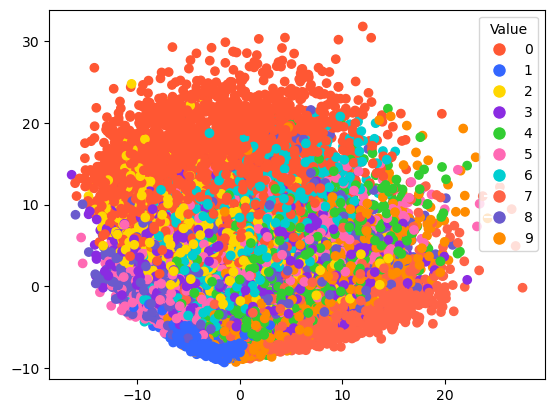

In [68]:
plt.scatter(pca_df["1_feature"].values,pca_df["2_feature"].values,c=color)
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=k, markersize=10) for k in color_label_mapping.keys()]
legend_labels = list(color_label_mapping.values())
plt.legend(legend_handles, legend_labels, title="Value")
plt.show()